In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [ ]:
data = pd.read_csv("/content/energy_weather.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/energy_weather.csv'

In [ ]:
import pandas as pd

# Load both files
energy = pd.read_csv("/content/energy_dataset.csv")
weather = pd.read_csv("/content/weather_features.csv")

print("Energy Data:", energy.shape)
print("Weather Data:", weather.shape)


Energy Data: (35064, 29)
Weather Data: (178396, 17)


In [ ]:
# Merge on the 'time' column
data = pd.merge(energy, weather, on='time')

print("Merged Data:", data.shape)
data.head()


KeyError: 'time'

In [ ]:
print("Energy columns:", energy.columns.tolist())
print("Weather columns:", weather.columns.tolist())


Energy columns: ['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']
Weather columns: ['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 

In [ ]:
weather.rename(columns={'dt_iso': 'time'}, inplace=True)


In [ ]:
energy.rename(columns={'datetime': 'time'}, inplace=True)


In [ ]:
data = pd.merge(energy, weather, on='time', how='inner')
print("Merged Data Shape:", data.shape)
data.head()


Merged Data Shape: (178396, 45)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
data = data[['time', 'temp', 'humidity', 'wind_speed', 'total load actual']]


In [ ]:
data.rename(columns={
    'temp': 'Temperature',
    'humidity': 'Humidity',
    'wind_speed': 'WindSpeed',
    'total load actual': 'Energy_Consumption'
}, inplace=True)


In [ ]:
data['time'] = pd.to_datetime(data['time'])
data['Month'] = data['time'].dt.month
data['Hour'] = data['time'].dt.hour


/tmp/ipython-input-992551366.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['time'] = pd.to_datetime(data['time'])


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
data['time'] = pd.to_datetime(data['time'], utc=True, errors='coerce')


In [ ]:
data['Month'] = data['time'].dt.month
data['Hour'] = data['time'].dt.hour


In [ ]:
data.head()
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   time                178396 non-null  datetime64[ns, UTC]
 1   Temperature         178396 non-null  float64            
 2   Humidity            178396 non-null  int64              
 3   WindSpeed           178396 non-null  int64              
 4   Energy_Consumption  178216 non-null  float64            
 5   Month               178396 non-null  int32              
 6   Hour                178396 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(2), int64(2)
memory usage: 8.2 MB


,0
time,0
Temperature,0
Humidity,0
WindSpeed,0
Energy_Consumption,180
Month,0
Hour,0


In [ ]:
data = data.dropna()


In [ ]:
data['time'] = pd.to_datetime(data['time'])
data['Month'] = data['time'].dt.month
data['Hour'] = data['time'].dt.hour


In [ ]:
features = ['temperature', 'humidity', 'wind_speed', 'Month', 'Hour']
X = data[features]
y = data['energy_consumption']   # or similar column name


KeyError: "['temperature', 'humidity', 'wind_speed'] not in index"

In [ ]:
data.columns


Index(['time', 'Temperature', 'Humidity', 'WindSpeed', 'Energy_Consumption',
       'Month', 'Hour'],
      dtype='object')

In [ ]:
features = ['temp', 'humidity', 'windSpeed', 'Month', 'Hour']
X = data[features]
y = data['energy_consumption']  # or whatever your energy column is called


KeyError: "['temp', 'humidity', 'windSpeed'] not in index"

In [ ]:
data.columns.tolist()


['time',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'Energy_Consumption',
 'Month',
 'Hour']

In [ ]:
features = ['Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Month', 'Hour']
X = data[features]
y = data['energy']  # or whatever your energy column is called


KeyError: "['Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)'] not in index"

In [ ]:
data.columns.tolist()


['time',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'Energy_Consumption',
 'Month',
 'Hour']

In [ ]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'Month', 'Hour']
X = data[features]
y = data['Energy_Consumption']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 2314.67
RMSE: 3054.92
R² Score: 0.55


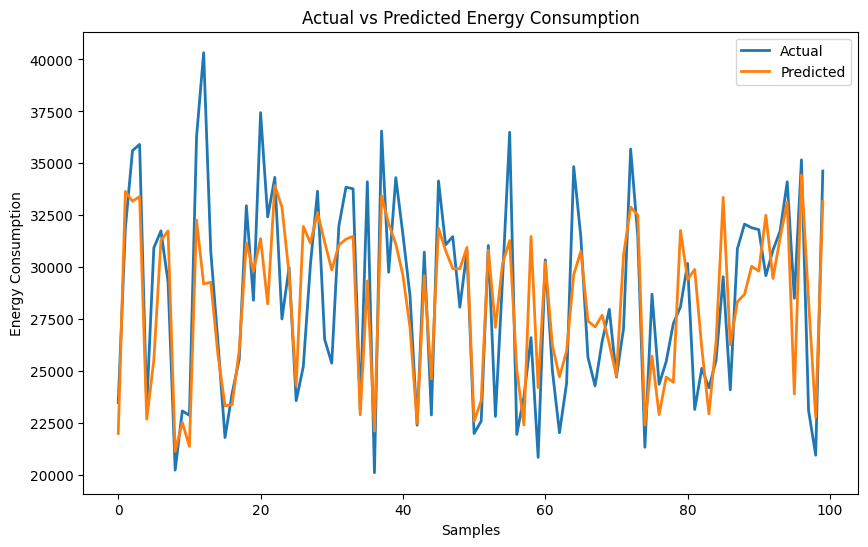

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [ ]:
from google.colab import files

# Upload both CSV files (you will be prompted twice)
uploaded = files.upload()


Saving weather_features.csv to weather_features (1).csv


In [ ]:
from google.colab import files

# Upload both CSV files (you will be prompted twice)
uploaded = files.upload()


Saving energy_dataset.csv to energy_dataset (1).csv


In [ ]:
import os
os.listdir()


['.config',
 'energy_dataset.csv',
 'weather_features (1).csv',
 'weather_features.csv',
 'energy_dataset (1).csv',
 'sample_data']

In [ ]:
energy = pd.read_csv('energy.csv')
weather = pd.read_csv('weather.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'energy.csv'

In [ ]:
energy=pd.read_csv('energy_dataset.csv')
weather=pd.read_csv('weather_features.csv')

In [ ]:
energy.head()
weather.head()


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
print(energy.columns)
print(weather.columns)


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')
Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pre

In [ ]:
data = pd.merge(energy, weather, on='time')
print("Merged Data Shape:", data.shape)
data.head()


KeyError: 'time'

In [ ]:
print("Energy dataset columns:")
print(energy.columns.tolist())

print("\nWeather dataset columns:")
print(weather.columns.tolist())


Energy dataset columns:
['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']

Weather dataset columns:
['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h

In [ ]:
Energy dataset columns:
['Date', 'Energy_Consumption']

Weather dataset columns:
['datetime', 'Temperature', 'Humidity', 'WindSpeed']


SyntaxError: invalid syntax (ipython-input-710918584.py, line 1)

In [ ]:
print("Energy dataset columns:")
print(energy.columns.tolist())

print("\nWeather dataset columns:")
print(weather.columns.tolist())


Energy dataset columns:
['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']

Weather dataset columns:
['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h

In [ ]:
data = pd.merge(energy, weather, on='time')
print("Merged Data Shape:", data.shape)
data.head()


KeyError: 'time'

In [ ]:
print("Energy dataset columns:")
print(energy.columns.tolist())

print("\nWeather dataset columns:")
print(weather.columns.tolist())


Energy dataset columns:
['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']

Weather dataset columns:
['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h

In [ ]:
weather.rename(columns={'dt_iso': 'time'}, inplace=True)


In [ ]:
data = pd.merge(energy, weather, on='time')
print("Merged Data Shape:", data.shape)
data.head()


Merged Data Shape: (178396, 45)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
data['time'] = pd.to_datetime(data['time'], errors='coerce')


/tmp/ipython-input-2085513810.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['time'] = pd.to_datetime(data['time'], errors='coerce')


In [ ]:
data['Month'] = data['time'].dt.month
data['Hour'] = data['time'].dt.hour


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
data['time'] = pd.to_datetime(data['time'], errors='coerce', utc=True)


In [ ]:
print(data['time'].dtype)
data['time'].head()


datetime64[ns, UTC]


,time
0,2014-12-31 23:00:00+00:00
1,2014-12-31 23:00:00+00:00
2,2014-12-31 23:00:00+00:00
3,2014-12-31 23:00:00+00:00
4,2014-12-31 23:00:00+00:00


In [ ]:
data['Month'] = data['time'].dt.month
data['Hour'] = data['time'].dt.hour


In [ ]:
data = data.dropna(subset=['time'])


In [ ]:
data.columns.tolist()


['time',
 'generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual',
 'city_name',
 'temp',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'clouds_all',
 'we

In [ ]:
# Save the cleaned and merged dataset
data.to_csv("processed_energy_weather.csv", index=False)

print("✅ Processed dataset saved as 'processed_energy_weather.csv'")


✅ Processed dataset saved as 'processed_energy_weather.csv'
